# HW 2: Wrangling

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)


*   I first found that the values > 999 in `Price` contained commas and the variable's type was string instead of numeric. To clean `Price`, I first removed any commas and then coerced the variable to be numeric. Finally, I checked the missing values, which was 0, and ensured the variable's type was numeric, thus my cleaning is complete.


2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
*   The proportion of values missing is 0.7619, which raises concern because it us a majority of the data and thus means that any analysis on the 'subject_injury' variable will be sensitive to bias. From the cross-tabulation of the cleaned `subject_injury`  variable and `force_type` variable revealed that the missingness is data can be strongly associated with force type. The force types of taser, chemical irritant, and bodily force have higher rates of missing injury information, potentially suggesting an underreporting for "less severe" (when compared to the other forces types of like gun point display) injuries.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
*   To clean the data, i first reffered to the codebook to make sense of the values 0, 1, and 9. I then coerced the `WhetherDefendantWasReleasedPretrial` variable to take values 0 = F, 1 = T, and 9 = np.nan. The coercion was checked to ensure missing values where replaced with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)
*   To clean the `ImposedSentenceAllChargeInContactEvent`, I first refferred to the codebook for variables `ImposedSentenceAllChargeInContactEvent` and `SentenceTypeAllChargesAtConvictionInContactEvent` to understand their values. From there, I read in the `ImposedSentenceAllChargeInContactEvent` and decided to coerce it to numeric so that enpty strings would be assigned NaN to help perserve the missingness of the data. The Sentence Type variable can help make meaningful observations of this missingness in the Imposed Sentence variable. To structure these missing values, I set 'ImposedSentence_clean = 0' for the sentence type of 0 (Meaning no probation or incarceration). For sentence types that are pending, dismissed, or unknown, I kept 'ImposedSentence_clean' to be NaN as the there is still an absent/unknown in the data. Lastly, I examined the summary statistics (specifically median) to confirm the values are reflective with my intent.

In [3]:
import pandas as pd
import numpy as np
air_df = pd.read_csv('/content/drive/MyDrive/DS3001/airbnb_hw.csv')
air_df.head()
## Part 1
# view 'Price' first 20
air_df["Price"].head(20)
# looking for missing vals or differences in formatting:
# check type (need to be numeric)
air_df["Price"].dtype # outputs 'O' aka str

# find vals > 999, w/ commas
print("Values > 999 in 'Price':")
greater_than_999 = air_df.loc[air_df["Price"].str.contains(","),
"Price"].head()
print(greater_than_999)

# remove commas
air_df["Price_clean"] = (air_df["Price"].str.replace(",", "", regex=False))

# coerce to numeric
air_df["Price_clean"] = pd.to_numeric(air_df["Price_clean"],errors="coerce")

# count any missing vals
print("Missing 'Price_clean' value count:")
price_clean_missing_count = air_df["Price_clean"].isna().sum()
print(price_clean_missing_count) # gives no missing vals


Values > 999 in 'Price':
101     1,990
263     1,000
764     1,200
1272    1,000
1275    5,000
Name: Price, dtype: object
Missing 'Price_clean' value count:
0


In [4]:
## Part 2
# readin mn_police_use_of_force file
police_df = pd.read_csv('/content/drive/MyDrive/DS3001/mn_police_use_of_force.csv')
police_df.head()
# count NaNs and find prop missing
missing_injury_count = police_df["subject_injury"].isna().sum()
proportion_missing = missing_injury_count / len(police_df)
print("Proportion of missing 'subject_injury' values:")
print(round(proportion_missing,4))

# check type
police_df['subject_injury'].dtype # output: str

# clean 'subject_injury'
# fill NAs w/no
police_df['subject_injury_clean'] = police_df['subject_injury'].fillna('No')
# convert any non-no to be yes
# col empty -> still no
police_df['subject_injury_clean'] = police_df['subject_injury_clean'].apply(
    lambda x: 'Yes' if x != 'No' else 'No')
print("Value counts for cleaned 'subject_injury' variable:")
print(police_df['subject_injury_clean'].value_counts())

# cross-tabulations
# cross-tab 'subject_injury_clean' w/'force_type'
print("Cross-tabulation of 'subject_injury_clean' and 'force_type':")
print(pd.crosstab(police_df['subject_injury_clean'], police_df['force_type']))
# cross-tab of og missing status w/'force type'
police_df['is_injury_missing'] = police_df['subject_injury'].isna()
print("Cross-tabulation of original missing status of 'subject_injury' and 'force_type':")
print(pd.crosstab(police_df['is_injury_missing'], police_df['force_type']))

Proportion of missing 'subject_injury' values:
0.7619
Value counts for cleaned 'subject_injury' variable:
subject_injury_clean
No     11294
Yes     1631
Name: count, dtype: int64
Cross-tabulation of 'subject_injury_clean' and 'force_type':
force_type            Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_clean                                                    
No                        2          8144               1552        2   
Yes                       2          1286                 41        0   

force_type            Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury_clean                                                      
No                                   60                108           87   
Yes                                  44                 40            0   

force_type            Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury_clean                                                        
No          

In [5]:
## Part 3
# Dummy variable: pretrial data covered in the lecture
# clean the WhetherDefendantWasReleasedPretrial variable
pretrial_df = pd.read_parquet('/content/drive/MyDrive/DS3001/justice_data.parquet')
pretrial_df['WhetherDefendantWasReleasedPretrial'].head()

# from codebook: 0 = Not released, 1 = was released, 9 = Unclear -> np.nan
# find how many unclear/unknown values there are
print("Count of Unknown Values in 'WhetherDefendantWasReleasedPretrial':" )
print((pretrial_df['WhetherDefendantWasReleasedPretrial'] == 9).sum()) # output:31

# coerce variable to be boolean (and thus, 9 -> np.nan)
# create mapping for O=F, 1=T, 9=np,nan
map = {0: False, 1: True, 9: np.nan}
pretrial_df['WhetherDefendantWasReleasedPretrial_clean'] = pretrial_df['WhetherDefendantWasReleasedPretrial'].map(map).astype('boolean')

# check that unknowns have been converted to np.nan values
print("Count of Unknown Values in 'WhetherDefendantWasReleasedPretrial_clean':" )
print(pretrial_df['WhetherDefendantWasReleasedPretrial_clean'].isna().sum())

Count of Unknown Values in 'WhetherDefendantWasReleasedPretrial':
31
Count of Unknown Values in 'WhetherDefendantWasReleasedPretrial_clean':
31


In [7]:
## Part 4
# Missing values, not at random: For the pretrial data covered in the lecture, clean the ImposedSentenceAllChargeInContactEvent
# variable as well as you can, and explain the choices you make. (Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)
pretrial_df = pd.read_parquet('/content/drive/MyDrive/DS3001/justice_data.parquet')
pretrial_df['ImposedSentenceAllChargeInContactEvent'].head()
## cleaning
# currently obj, coerce to numeric
# empty strings will be NaN
pretrial_df['ImposedSentence_clean'] = (pd.to_numeric(
    pretrial_df['ImposedSentenceAllChargeInContactEvent'],errors='coerce'))

# use sentence type table from codebook
# 0 for probabtion, no incarce
pretrial_df.loc[
    pretrial_df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 0,
    'ImposedSentence_clean'
] = 0
# mp.nan for pending, dismissed, unknown
pretrial_df.loc[
    pretrial_df['SentenceTypeAllChargesAtConvictionInContactEvent'].isin([4, 9]),
    'ImposedSentence_clean'
] = np.nan
# use describe to check median vals by sentencetype
pretrial_df.groupby('SentenceTypeAllChargesAtConvictionInContactEvent')['ImposedSentence_clean'].describe()


,count,mean,std,min,25%,50%,75%,max
SentenceTypeAllChargesAtConvictionInContactEvent,,,,,,,,
0,8720.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0
1,4299.0,22.362509,46.211739,0.032854,3.00000,12.0,24.0,1029.0
2,914.0,130.525957,177.105468,12.000000,48.98922,72.0,132.0,2208.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?


*   Shark attacks are not strictly increasing, decreasing, or remaining constant over time. There are local peaks around 1960 and 2010, with a drastic decrease since the 2010's. There was a steady increase from around 1980 to 2010, and has been a decline since the peak around 2010.


4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?


*   The proportion of victims that are male is 0.8506.


6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
*   The proportion of attacks unprovoked is 0.8328.
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
*   The attack more likely to be against men when unprovoked. Also, the attack is more likely to be fatal when unprovoked. Attacks are more likely to be fatal against men, but only by a 4% margin. I personally do not feel negative towards sharks, ulitmately they are predators of the ocean and we are essentially guests. Shark attacks are uncommon and are somewhat preventable with safety measures.
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)
*   The proportion of attacks appearing to be by white sharks is 0.1221.

Part 3:
Five-number Summary:
min    1940.0
25%    1970.0
50%    2000.0
75%    2013.0
max    2026.0
Name: Year, dtype: float64
Missing Values for Shark Attacks Since 1940
0


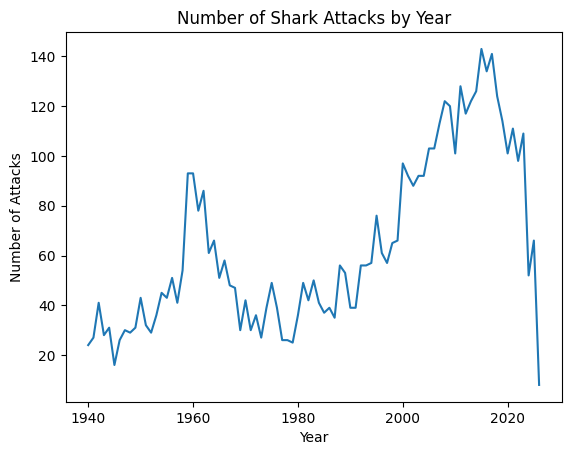

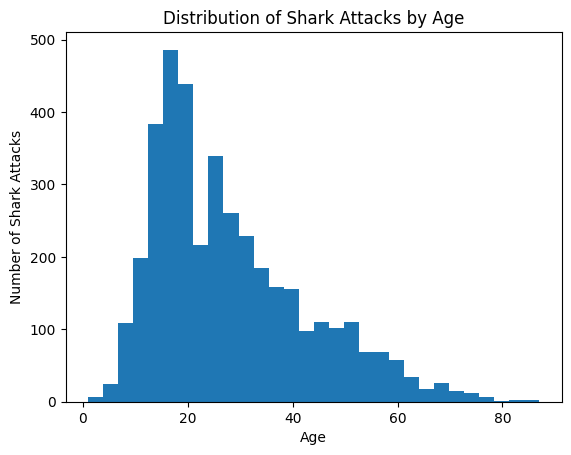

Proportions of Male Victims:
0.8506
Type_clean
Unprovoked    3267
Unknown        346
Provoked       310
Name: count, dtype: int64
Proportion unprovoked:
0.8328
Unprovoked attacks by gender (proportions):
Sex_clean
M    0.844
F    0.156
Name: proportion, dtype: float64
Unprovoked attacks by gender (counts):
Sex_clean
M    2738
F     506
Name: count, dtype: int64
Fatality rate by attack type:
Type_clean
Provoked      0.029316
Unprovoked    0.196429
Name: Fatal_clean, dtype: float64
Fatality rate by gender:
Sex_clean
F    0.154982
M    0.190093
Name: Fatal_clean, dtype: float64
Proportion of attacks involving white sharks:
0.12210043334183023


In [18]:
## Part 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# open shark attack file with pandas
shark_df = pd.read_excel('/content/drive/MyDrive/DS3001/GSAF5.xls')
shark_df.head()

## Part 2
# drop cols without data
shark_df = shark_df.dropna(axis=1, how='all')

## Part 3
# clean year variable, filter the rows to focus on attacks since 1940
# view variable and check type:
shark_df["Year"].head(20)
shark_df["Year"].dtype # output: float64
# count missing values
shark_df["Year"].isna().sum() # 2 missing vals
# filter to >= 1940
shark_1940 = shark_df[shark_df["Year"] >= 1940]
print("Part 3:")
# describe the range
five_number_summary = shark_1940["Year"].describe()[['min', '25%', '50%', '75%', 'max']]
print("Five-number Summary:")
print(five_number_summary)
print("Missing Values for Shark Attacks Since 1940")
print(shark_1940["Year"].isna().sum()) # 0 missing bc na's filteres out
# plot shark_1940 count vs year
attacks_year = shark_1940.groupby("Year").size()
attacks_year.plot()
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Number of Shark Attacks by Year")
plt.show()

## Part 4
# clean the age variable and make hist
shark_df["Age"].head()
shark_df["Age"].dtype # output: '0' aka str
# coerce to numeric
shark_df["Age_clean"] = pd.to_numeric(shark_df["Age"],errors="coerce")
# count missing values
shark_df["Age_clean"].isna().sum() # 3147 missing vals
# remove observations w/o age
shark_df = shark_df.dropna(subset=["Age_clean"])
# make hist
plt.figure()
plt.hist(shark_df["Age_clean"], bins=30)
plt.xlabel("Age")
plt.ylabel("Number of Shark Attacks")
plt.title("Distribution of Shark Attacks by Age")
plt.show()


## Part 5
# what proportions of victims are male
shark_df["Sex"].value_counts(normalize=True) # gives more tan just M or F
# need to clean (strip and uppercase all)
shark_df["Sex_clean"] = shark_df["Sex"].str.strip().str.upper()
print("Proportions of Male Victims:")
print(round(shark_df["Sex_clean"].value_counts(normalize=True)["M"], 4))

## Part 6
# clean Type Variable
# clean the type variable so it only takes provoked, unprovoked, and unknown
# find proprot of attacks that are unprovoked
# see the diff values
shark_df["Type"].value_counts(dropna=False).head(20) # outputs: int64
# need to normalize/standardize Type
type_raw = shark_df["Type"].astype(str).str.strip().str.lower()

# make mapping for provoked, unprovoked, and unknown
def clean_type(x):
    if x == "unprovoked":
        return "Unprovoked"
    elif x == "provoked":
        return "Provoked"
    else:
        return "Unknown"

shark_df["Type_clean"] = type_raw.map(clean_type)
# make sure na's are still unknown
shark_df.loc[shark_df["Type"].isna(), "Type_clean"] = "Unknown"

# value counts
print(shark_df["Type_clean"].value_counts(dropna=False))
# proprt unprovoked
print("Proportion unprovoked:")
print(round((shark_df["Type_clean"] == "Unprovoked").mean(),4))

## Part 7
# clean the fatal Y/N variable so it only takes Y, N, and unknown
shark_df["Fatal Y/N"].value_counts(dropna=False).head(20)
# normalize like in pt 6
fatal_raw = shark_df["Fatal Y/N"].astype(str).str.strip().str.upper()

# mapping for only Y, N, and Unknown 9everything else)
shark_df["Fatal_clean"] = np.where(fatal_raw == "Y", "Y",
                           np.where(fatal_raw == "N", "N", "Unknown"))

# fix missing vals to be Unknown
shark_df.loc[shark_df["Fatal Y/N"].isna(), "Fatal_clean"] = "Unknown"

## Part 8
# look at unprovoked vs provoked by gender and the fatality
# a: unprovoked attacks by gender
unprovoked_gender = shark_df[
    (shark_df["Type_clean"] == "Unprovoked") &
    (shark_df["Sex_clean"].isin(["M", "F"]))
]

print("Unprovoked attacks by gender (proportions):")
print(round(unprovoked_gender["Sex_clean"].value_counts(normalize=True),4))
# b: fatality by provoked vs unprovoked
type_fatal = shark_df[
    shark_df["Type_clean"].isin(["Provoked", "Unprovoked"]) &
    shark_df["Fatal_clean"].isin(["Y", "N"])]
fatal_by_type = type_fatal.groupby("Type_clean")["Fatal_clean"].apply(lambda x: (x == "Y").mean())
print("Fatality rate by attack type:")
print(fatal_by_type)

# c: fatality by gender
gender_fatal = shark_df[
    shark_df["Sex_clean"].isin(["M", "F"]) &
    shark_df["Fatal_clean"].isin(["Y", "N"])]
fatal_by_gender = gender_fatal.groupby("Sex_clean")["Fatal_clean"].apply(lambda x: (x == "Y").mean())
print("Fatality rate by gender:")
print(fatal_by_gender)


## Part 9
# what propt of attacks are white sharks
# need to look at species
species_col = [c for c in shark_df.columns if "species" in c.lower()][0]
# clean and split
species_text = shark_df[species_col].fillna("").astype(str).str.lower().str.strip()
species_split = species_text.str.split()
# check for white
white_shark = species_split.apply(lambda words: "white" in words)
# proportion
prop_white = white_shark.mean()
print("Proportion of attacks involving white sharks:")
print(round(prop_white, 4))


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?


*   The purpose of this paper is to explain the key principles of tidy data, specifically how tidy datasets are structured, why this provides advantages to the data cleaning process, and the tools can be used for analysis.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?


*   The tidy data standard was created to aid the "initial exploration and analysis of the data, and to simplify the development of data analysis tools" that can work in hand with tidy data.


  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."


*   Alluding to Tolstoy, this quote can be understood as tidy datasets having a standardized structure that links the layout of a dataset to its meaning, whereas messy datasets are moreso all over the place and are unstandardize. Further, when looking at a given dataset, the reader can usually figure out what the observations and variables are based off of physical layout/appearance, but it can be quite hard to generalize the definitions for variables and observations because each is case specific. For instance, weight might be a variable for a medical experiment, but is an observation for a wildlife observational study. Thus, we are unable to generalize weight to be either a variable or an observation.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  *   using the definition of value, Wickham defines a variable to be something that contains all values measuring the same attribute, and observations to be containing all values measured on the same unit/scall acorss differing attributes.
  5. How is "Tidy Data" defined in section 2.3?
  *   Tidy data is defined as a standardized approach to mapping meaning of datasets to their stucture with the following approach of: each variable forming a column, each observation forming a row, and each type of observational unit forming a table.
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  *   The 5 most common problems with messy datasets are "column headers are values, not variable names; multiple variables are stored in one column; variables are stored in both rows and columns; multiple types of observational units are stored in the same table; a single observational unit is stored in multiple tables". For example, the data in Table 4 is messy because it has three variables, religion, income, and frequency, in one table. To make it tidy requires "melting", which is essentially turing columns into rows.
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  *   Table 11 is messy because it hase a column for each specific day in a month, whereas table 12 combines the year, month, and d1,...,d31 to one 'date' column.Table 12(a) is molten because the element columns has the names of tha variables instead of values, but 12(b) is tidy as the element column is dropped and the two measured variables (tmin and tmax) are each given a column; all other variables are fixed.
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
  *   The chicken-and-the-egg problem is that "if tidy data is only as useful as the tools that work with it,then tidy tools will be inextricably linked to tidy data". Wickham hopes that human factors, user-centered design, and human-computer tools can provide useful methodologies to help impove both the understanding of data analysis and further imrpove the ability to design tools.